# Probability Distributions

## Random Variables

In [1]:
#Listing 3.1: A simple random variable
using StatsBase, Plots; pyplot()
names = ["Mary","Mel","David","John","Kayley","Anderson"]
randomName() = rand(names)
X = 3:8
N = 10^6
sampleLengths = [length(randomName()) for _ in 1:N]

1000000-element Array{Int64,1}:
 8
 4
 6
 4
 4
 3
 8
 6
 3
 5
 8
 4
 4
 ⋮
 4
 3
 8
 8
 8
 5
 6
 8
 5
 6
 3
 5

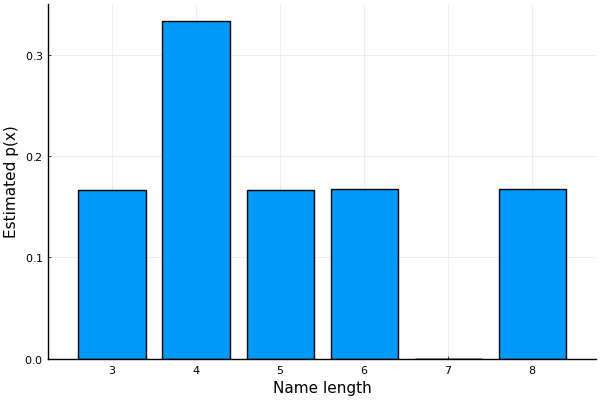

In [2]:
bar(X, counts(sampleLengths)/N, ylims=(0,0.35), xlabel="Name length", ylabel="Estimated p(x)", legend=:none)

### Types of Random Variables

In [3]:
# using Pkg;
# Pkg.add("Measures")

In [4]:
# Listing 3.2: Plotting discrete and continuous distributions
using Plots, Measures; pyplot()

pDiscrete = [0.25, 0.25, 0.5]
xGridD = 0:2

LoadError: [91mArgumentError: Package Measures not found in current path:[39m
[91m- Run `import Pkg; Pkg.add("Measures")` to install the Measures package.[39m


In [24]:
pContinuous(x) = 3/4*(1 - x^2)
xGridC = -1:0.01:1

-1.0:0.01:1.0

In [25]:
pContinuous2(x) = x < 0 ? x+1 : 1-x

pContinuous2 (generic function with 1 method)

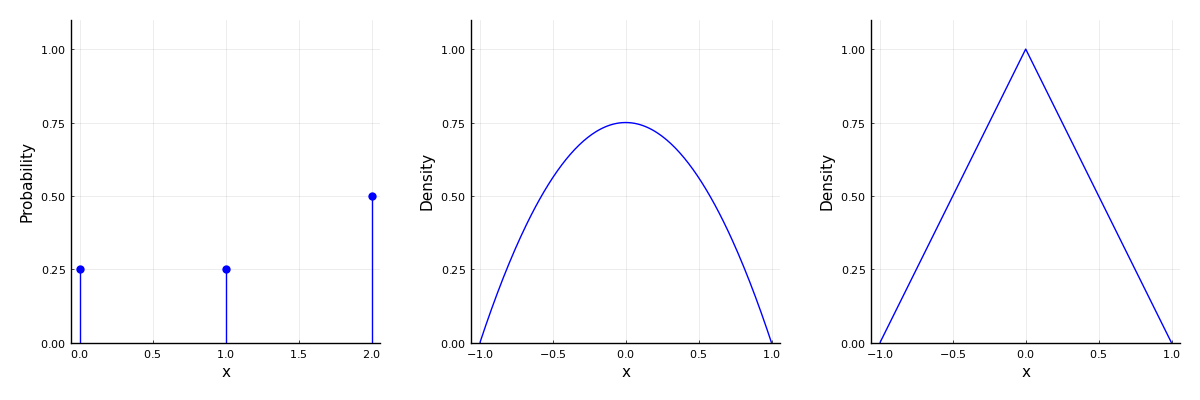

In [26]:
p1 = plot(xGridD, line=:stem, pDiscrete, marker=:circle, c=:blue, ms=6, msw=0)
p2 = plot(xGridC, pContinuous.(xGridC), c=:blue)
p3 = plot(xGridC, pContinuous2.(xGridC), c=:blue)
plot(p1, p2, p3, layout=(1,3), legend=false, ylims=(0,1.1), xlabel="x",
    ylabel=["Probability" "Density" "Density"], size=(1200, 400), margin=5mm)

## Moment Based Descriptors

### Mean

In [27]:
# using Pkg;
# Pkg.add("QuadGK")

In [28]:
# Listing 3.3: Expectation via numerical integration
using QuadGK

sup = (-1,1)
f1(x) = 3/4*(1-x^2)
f2(x) = x < 0 ? x+1 : 1-x

f2 (generic function with 1 method)

In [29]:
expect(f, support) = quadgk((x) -> x*f(x), support...)[1]

expect (generic function with 1 method)

In [30]:
println("Mean 1: ", expect(f1,sup))

Mean 1: 0.0


In [31]:
println("Mean 2: ", expect(f2,sup))

Mean 2: -2.0816681711721685e-17


### Variance

In [32]:
# using Pkg;
# Pkg.add("Distributions")

In [33]:
# Listing 3.4: Variance of X as the mean of Y
using Distributions, Plots; pyplot()

Plots.PyPlotBackend()

In [34]:
dist = TriangularDist(4,6,5)
N = 10^6
data = rand(dist, N)
yData = (data .- 5) .^2

1000000-element Array{Float64,1}:
 0.4822817355188593
 0.023047474600081486
 0.04324011125103666
 1.575949181391064e-5
 0.04694612851592093
 0.0038682586765129913
 0.005061321458677098
 0.018721850144399775
 0.00831040532145425
 0.08840127692495806
 0.4551348124272253
 0.2231605702772477
 0.6096283854851436
 ⋮
 0.32242183693125626
 0.2556079249216382
 0.269345398467898
 0.051517161733821724
 0.003034437203901214
 0.009425392504815878
 0.04480837254858249
 0.20235554327097524
 0.07376540681742504
 0.36542186789380915
 0.3674383694828812
 0.0018941606819482255

In [35]:
println("Mean: ", mean(yData), " Variance: ", var(data))

Mean: 0.16664551392027346 Variance: 0.16664530791810558


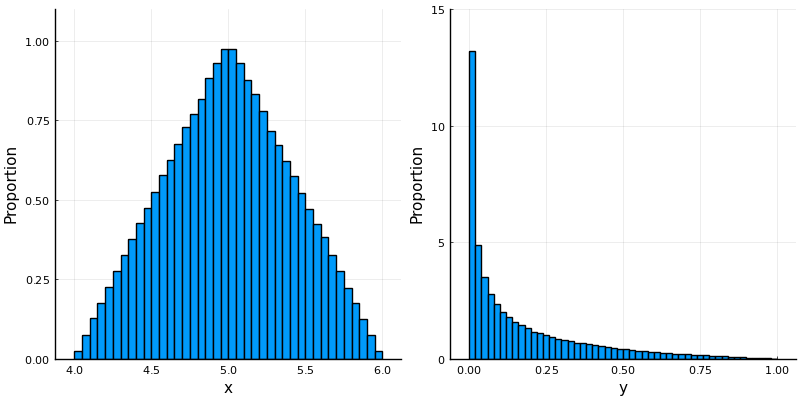

In [36]:
p1 = histogram(data, xlabel="x", bins=80, normed=true, ylims=(0,1.1))
p2 = histogram(yData, xlabel="y", bins=80, normed=true, ylims=(0,15))
plot(p1, p2, ylabel="Proportion", size=(800, 400), legend=:none)

## Functions Describing Distributions

### Cumulative Probabilities

In [37]:
# Listing 3.5: CDF from the Riemann sum of a PDF
using Plots, LaTeXStrings; pyplot()

Plots.PyPlotBackend()

In [46]:
f2(x) = (x<0 ? x+1 : 1-x)*(abs(x)<1 ? 1 : 0)
a, b = -1.5, 1.5
delta = 0.01

F(x) = sum([f2(u)*delta for u in a:delta:x])

F (generic function with 1 method)

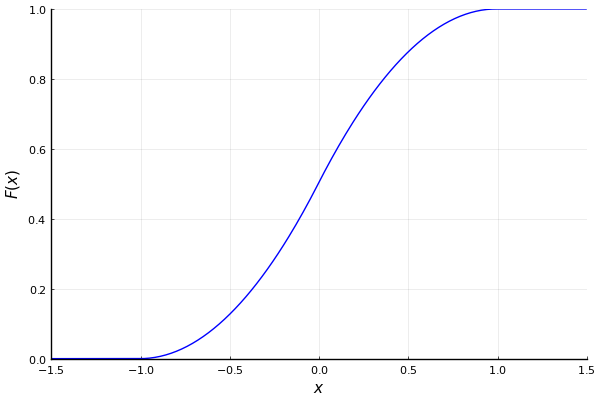

In [47]:
xGrid = a:delta:b
y = [F(u) for u in xGrid]
plot(xGrid, y, c=:blue, xlims=(a,b), ylims=(0,1), 
	xlabel=L"x", ylabel=L"F(x)", legend=:none)

### Inverse and Quantiles

In [ ]:
# import Pkg; Pkg.add("LaTeXStrings")
# Pkg.add("PyPlot")

In [7]:
# Listing 3.6: The inverse CDF
using Plots, LaTeXStrings; pyplot()

xGrid = 0:0.01:10
uGrid = 0:0.01:1
busy = 0.8

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1278


0.8

In [9]:
F(t) = t<=0 ? 0 : 1 - busy * exp(-(1-busy)t)

F (generic function with 1 method)

In [10]:
infimum(B) = isempty(B) ? Inf : minimum(B)
invF(u) = infimum(filter((x) -> (F(x) >= u), xGrid))

invF (generic function with 1 method)

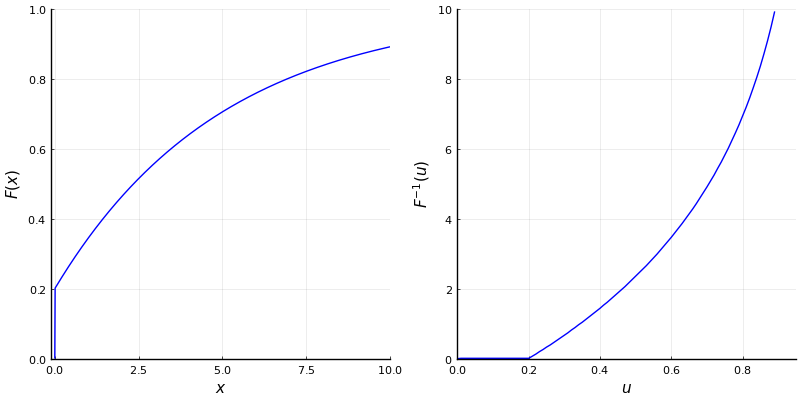

In [11]:
p1 = plot(xGrid,F.(xGrid), c=:blue, xlims=(-0.1,10), ylims=(0,1),xlabel=L"x", ylabel=L"F(x)")
p2 = plot(uGrid,invF.(uGrid), c=:blue, xlims=(0,0.95), ylims=(0,maximum(xGrid)),xlabel=L"u", ylabel=L"F^{-1}(u)")
plot(p1, p2, legend=:none, size=(800, 400))

### Integral Transforms

In [8]:
using Distributions, Statistics, Plots; pyplot()

Plots.PyPlotBackend()

In [9]:
# Listing 3.7: A sum of two triangular random variables

dist1 = TriangularDist(0, 1, 1)
dist2 = TriangularDist(0, 1, 0)
N=10^6

data1, data2 = rand(dist1, N), rand(dist2, N)
dataSum = data1 + data2

1000000-element Array{Float64,1}:
 0.8372055828633843
 1.3724679341187664
 1.0912227873219429
 1.1865903955113506
 1.5742864514059167
 0.4243675584346158
 0.5227814022317837
 1.3871551136710163
 1.4802316371859354
 1.038330638599588
 0.776259961824006
 1.169130405928872
 1.1695152372892832
 ⋮
 1.3253723103480415
 0.8921061046553151
 1.1734130650631043
 1.3603320873662743
 0.8806090452837559
 1.1292713587205356
 0.668092517189759
 1.5891974435785707
 1.1654613993442238
 0.7607170290117806
 0.8485889235398097
 0.6609211254512811

In [12]:
mgf(s) = 4(1+(s-1)*MathConstants.e^s)*(MathConstants.e^s-1-s)/s^4
mgfPointEst(s) = mean([MathConstants.e^(s*z) for z in rand(dist1, 20) + rand(dist2, 20)])

mgfPointEst (generic function with 1 method)

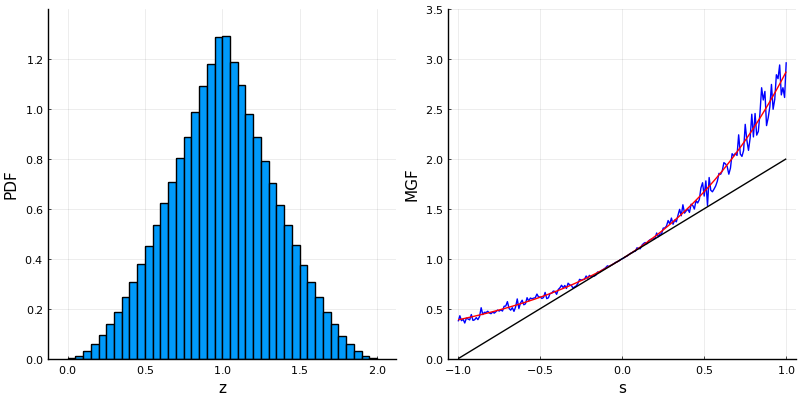

In [13]:
p1 = histogram(dataSum, bins=80, normed=:true, ylims=(0,1.4), xlabel="z", ylabel="PDF")

sGrid = -1:0.01:1
p2 = plot(sGrid, mgfPointEst.(sGrid), c=:blue, ylims=(0,3.5))
p2 = plot!(sGrid, mgf.(sGrid), c=:red)
p2 = plot!( [minimum(sGrid),maximum(sGrid)],[minimum(sGrid),maximum(sGrid)].+1,
c=:black, xlabel="s", ylabel="MGF")

plot(p1, p2, legend=:none, size=(800, 400))